# Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import time

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..
from sklearn.model_selection import train_test_split
import scipy.stats as st

from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Preliminary data exploration

In [2]:
data_water= pd.read_csv("drinking_water.csv")
data_sanitation = pd.read_csv("sanitation.csv")
data_asylum = pd.read_excel("asylum_applications.xlsx")
data_refugees = pd.read_excel("demographics2.xlsx")
voice= pd.read_excel("Voice.xlsx")
political=pd.read_excel("Political.xlsx")
government=pd.read_excel("Government.xlsx")
regulatory= pd.read_excel("Regulatory.xlsx")
rule=pd.read_excel("Rule of Law.xlsx")
corruption=pd.read_excel("Control of Corruption.xlsx")
vih= pd.read_excel("VIH.xlsx")
intestinal= pd.read_excel("intestinal.xlsx")
form_government=pd.read_excel("form_government.xlsx")

In [3]:
data_water.shape
data_sanitation.shape
data_asylum.shape
data_refugees.shape
voice.shape
political.shape
government.shape
regulatory.shape
rule.shape
corruption.shape
vih.shape
intestinal.shape
form_government.shape

(3774, 8)

(3828, 8)

(13400, 3)

(9577, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(864, 3)

(880, 3)

(864, 3)

(54, 3)

In [4]:
data_water.info()
data_sanitation.info()
data_asylum.info()
data_refugees.info()
voice.info()
political.info()
government.info()
regulatory.info()
rule.info()
corruption.info()
vih.info()
intestinal.info()
form_government.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3774 non-null   object 
 1   Country         3774 non-null   object 
 2   Residence Type  3774 non-null   object 
 3   Service Type    3774 non-null   object 
 4   Year            3774 non-null   int64  
 5   Coverage        3774 non-null   float64
 6   Population      3774 non-null   float64
 7   Service level   3774 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 236.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO3            3828 non-null   object 
 1   Country         3828 non-null   object 
 2   Residence Type  3828 non-null   object 
 3   Service Type    3828 non-null   object 
 4  

In [5]:
def clean(x):
    if x in ['Cape Verde']:
        return 'Cabo Verde'
    elif x in ['Congo, Rep.']:
        return 'Congo'
    elif x in ['Congo, Dem. Rep.']:
        return 'Democratic Republic of the Congo'
    elif x in ['Egypt, Arab Rep.']:
        return 'Egypt'
    elif x in ['Gambia, The']:
        return 'Gambia'
    elif x in ['Tanzania']:
        return 'United Republic of Tanzania'
    else:
        return x

def clean2(x):
    if x in ['Central African Rep.']:
        return 'Central African Republic'
    elif x in ['Dem. Rep. of the Congo']:
        return 'Democratic Republic of the Congo'
    elif x in ['United Rep. of Tanzania']:
        return 'United Republic of Tanzania'
    else:
        return x

voice['Country'] = list(map(clean, voice['Country']))
political['Country'] = list(map(clean, political['Country']))
government['Country'] = list(map(clean, government['Country']))
regulatory['Country'] = list(map(clean, regulatory['Country']))
rule['Country'] = list(map(clean, rule['Country']))
corruption['Country'] = list(map(clean, corruption['Country']))
data_asylum['Country of origin'] = list(map(clean2, data_asylum['Country of origin']))
data_refugees['Country of origin'] = list(map(clean2, data_refugees['Country of origin']))

In [6]:
data_water.shape
data_sanitation.shape
data_water.head()

(3774, 8)

(3828, 8)

,ISO3,Country,Residence Type,Service Type,Year,Coverage,Population,Service level
0,AGO,Angola,total,Drinking water,2001,42.25467,7.176224e+06,At least basic
1,AGO,Angola,total,Drinking water,2002,43.37680,7.622452e+06,At least basic
2,AGO,Angola,total,Drinking water,2003,44.36387,8.075720e+06,At least basic
3,AGO,Angola,total,Drinking water,2004,45.35134,8.555854e+06,At least basic
4,AGO,Angola,total,Drinking water,2005,46.33602,9.059869e+06,At least basic


In [7]:
data1 = pd.merge(left = data_water, #this is a table
                                right = data_sanitation, #this is a table
                                how = 'left',  #how do we merge
                                left_on = ["Country","Year","Service level"], 
                                right_on= ["Country","Year","Service level"]) 
data_asylum.columns
data_refugees.columns
data1.shape

Index(['Year', 'Country of origin', 'applied'], dtype='object')

Index(['Year', 'Country of origin', 'Total'], dtype='object')

(3774, 13)

In [8]:
voice.head()
political.shape


,Country,Year,Voice and Accountability
0,Algeria,2013,23.943663
1,Algeria,2012,22.535212
2,Algeria,2011,20.187794
3,Algeria,2010,18.483412
4,Algeria,2009,17.535545


(864, 3)

In [9]:
data2 = pd.merge(left = voice, #this is a table
                                right = political, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"]) 
data2.shape

(864, 4)

In [10]:
government.shape

(864, 3)

In [11]:
data3 = pd.merge(left = data2, #this is a table
                                right = government, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"])
data3.shape

(864, 5)

In [12]:
regulatory.shape

(864, 3)

In [13]:
data4 = pd.merge(left = data3, #this is a table
                                right = regulatory, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"])
data4.shape

(864, 6)

In [14]:
rule.shape

(864, 3)

In [15]:
data5 = pd.merge(left = data4, #this is a table
                                right = rule, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"])
data5.shape

(864, 7)

In [16]:
corruption.shape

(864, 3)

In [17]:
data6 = pd.merge(left = data5, #this is a table
                                right = corruption, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"])
data6.shape

(864, 8)

In [18]:
vih.shape
vih.head()

(880, 3)

,location_name,year,val
0,South Sudan,2002,5541.153450
1,Niger,2002,3924.527377
2,Benin,2002,4676.213058
3,Sao Tome and Principe,2002,5.256532
4,Madagascar,2002,2940.935010


In [19]:
data7 = pd.merge(left = data6, #this is a table
                                right = vih, #this is a table
                                how = 'left',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["location_name","year"])
data7.shape
data7.head()

(864, 11)

,Country,Year,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,location_name,year,val
0,Algeria,2013,23.943663,12.796208,35.071091,11.848341,30.985916,39.336494,Algeria,2013.0,454.156856
1,Algeria,2012,22.535212,9.478673,35.071091,9.004740,26.760563,37.440758,Algeria,2012.0,456.700061
2,Algeria,2011,20.187794,10.426540,36.018959,9.952606,24.413145,35.071091,Algeria,2011.0,454.240481
3,Algeria,2010,18.483412,11.848341,38.755981,9.569378,26.540285,36.666668,Algeria,2010.0,455.736521
4,Algeria,2009,17.535545,13.270143,35.406700,12.918660,23.222750,33.492825,Algeria,2009.0,454.986524


In [20]:
intestinal.shape

(864, 3)

In [21]:
data8 = pd.merge(left = data7, #this is a table
                                right = intestinal, #this is a table
                                how = 'left',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["location_name","year"])
data8.shape

(864, 14)

In [22]:
data_asylum.shape

(13400, 3)

In [23]:
data1.shape
data8.shape
data8.head()

(3774, 13)

(864, 14)

,Country,Year,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,location_name_x,year_x,val_x,location_name_y,year_y,val_y
0,Algeria,2013,23.943663,12.796208,35.071091,11.848341,30.985916,39.336494,Algeria,2013.0,454.156856,Algeria,2013.0,3.098165
1,Algeria,2012,22.535212,9.478673,35.071091,9.004740,26.760563,37.440758,Algeria,2012.0,456.700061,Algeria,2012.0,3.157599
2,Algeria,2011,20.187794,10.426540,36.018959,9.952606,24.413145,35.071091,Algeria,2011.0,454.240481,Algeria,2011.0,3.310561
3,Algeria,2010,18.483412,11.848341,38.755981,9.569378,26.540285,36.666668,Algeria,2010.0,455.736521,Algeria,2010.0,3.468056
4,Algeria,2009,17.535545,13.270143,35.406700,12.918660,23.222750,33.492825,Algeria,2009.0,454.986524,Algeria,2009.0,3.658437


In [24]:

data_asylum.shape
data_refugees.shape
data_refugees.head()

(13400, 3)

(9577, 3)

,Year,Country of origin,Total
0,2002,Algeria,6
1,2002,Algeria,117
2,2002,Algeria,21
3,2002,Algeria,5
4,2002,Algeria,94


In [25]:
data_asylum.shape
data_refugees.shape
data_asylum= data_asylum.groupby(by=['Country of origin','Year']).agg({'applied':sum}).reset_index()
data_refugees= data_refugees.groupby(by=['Country of origin','Year']).agg({'Total':sum}).reset_index()

data9 = pd.merge(left = data_asylum, #this is a table
                                right = data_refugees, #this is a table
                                how = 'right',  #how do we merge
                                left_on = ["Country of origin","Year"], 
                                right_on= ["Country of origin","Year"])
data9.shape
data9.head()

(13400, 3)

(9577, 3)

(824, 4)

,Country of origin,Year,applied,Total
0,Algeria,2002,9867.0,7176
1,Algeria,2003,8041.0,7210
2,Algeria,2004,10230.0,6627
3,Algeria,2005,5343.0,8883
4,Algeria,2006,3615.0,4813


In [26]:
data = data1[data1['Service level']== 'Limited service']
data.shape

(906, 13)

In [27]:
data1.shape
data8.shape

data10 = pd.merge(left = data, #this is a table
                                right = data8, #this is a table
                                how = 'right',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country","Year"])

data10.shape
data10.head()

(3774, 13)

(864, 14)

(864, 25)

,ISO3_x,Country,Residence Type_x,Service Type_x,Year,Coverage_x,Population_x,Service level,ISO3_y,Residence Type_y,...,Government,Regulatory Quality,Rule of Law,Control of Corruption,location_name_x,year_x,val_x,location_name_y,year_y,val_y
0,DZA,Algeria,total,Drinking water,2013,5.23761,2.008024e+06,Limited service,DZA,total,...,35.071091,11.848341,30.985916,39.336494,Algeria,2013.0,454.156856,Algeria,2013.0,3.098165
1,DZA,Algeria,total,Drinking water,2012,5.25701,1.974839e+06,Limited service,DZA,total,...,35.071091,9.004740,26.760563,37.440758,Algeria,2012.0,456.700061,Algeria,2012.0,3.157599
2,DZA,Algeria,total,Drinking water,2011,5.27685,1.942915e+06,Limited service,DZA,total,...,36.018959,9.952606,24.413145,35.071091,Algeria,2011.0,454.240481,Algeria,2011.0,3.310561
3,DZA,Algeria,total,Drinking water,2010,5.29709,1.913184e+06,Limited service,DZA,total,...,38.755981,9.569378,26.540285,36.666668,Algeria,2010.0,455.736521,Algeria,2010.0,3.468056
4,DZA,Algeria,total,Drinking water,2009,5.31775,1.885980e+06,Limited service,DZA,total,...,35.406700,12.918660,23.222750,33.492825,Algeria,2009.0,454.986524,Algeria,2009.0,3.658437


In [28]:
data10.shape
data9.shape
data9.head()

(864, 25)

(824, 4)

,Country of origin,Year,applied,Total
0,Algeria,2002,9867.0,7176
1,Algeria,2003,8041.0,7210
2,Algeria,2004,10230.0,6627
3,Algeria,2005,5343.0,8883
4,Algeria,2006,3615.0,4813


In [29]:
data11 = pd.merge(left = data10, #this is a table
                                right = data9, #this is a table
                                how = 'right',  #how do we merge
                                left_on = ["Country","Year"], 
                                right_on= ["Country of origin","Year"])

data11.shape
data11.head()

(824, 28)

,ISO3_x,Country,Residence Type_x,Service Type_x,Year,Coverage_x,Population_x,Service level,ISO3_y,Residence Type_y,...,Control of Corruption,location_name_x,year_x,val_x,location_name_y,year_y,val_y,Country of origin,applied,Total
0,DZA,Algeria,total,Drinking water,2002,5.46453,1.748377e+06,Limited service,DZA,total,...,23.232323,Algeria,2002.0,337.356467,Algeria,2002.0,5.989716,Algeria,9867.0,7176
1,DZA,Algeria,total,Drinking water,2003,5.44399,1.764044e+06,Limited service,DZA,total,...,28.787878,Algeria,2003.0,360.341265,Algeria,2003.0,5.450697,Algeria,8041.0,7210
2,DZA,Algeria,total,Drinking water,2004,5.42323,1.780507e+06,Limited service,DZA,total,...,27.804878,Algeria,2004.0,383.470642,Algeria,2004.0,5.094135,Algeria,10230.0,6627
3,DZA,Algeria,total,Drinking water,2005,5.40235,1.798358e+06,Limited service,DZA,total,...,40.000000,Algeria,2005.0,405.811788,Algeria,2005.0,4.736456,Algeria,5343.0,8883
4,DZA,Algeria,total,Drinking water,2006,5.38126,1.817678e+06,Limited service,DZA,total,...,36.585365,Algeria,2006.0,426.181157,Algeria,2006.0,4.423569,Algeria,3615.0,4813


In [30]:
data12 = pd.merge(left = data11, #this is a table
                                right = form_government, #this is a table
                                how = 'inner',  #how do we merge
                                left_on = ["Country"], 
                                right_on= ["Country"])
data12.shape

(786, 30)

In [31]:
data12.columns

Index(['ISO3_x', 'Country', 'Residence Type_x', 'Service Type_x', 'Year',
       'Coverage_x', 'Population_x', 'Service level', 'ISO3_y',
       'Residence Type_y', 'Service Type_y', 'Coverage_y', 'Population_y',
       'Voice and Accountability ',
       'Political Stability and Absence of Violence', 'Government ',
       'Regulatory Quality', 'Rule of Law', 'Control of Corruption',
       'location_name_x', 'year_x', 'val_x', 'location_name_y', 'year_y',
       'val_y', 'Country of origin', 'applied', 'Total', 'Form of Government',
       'Unnamed: 2'],
      dtype='object')

In [32]:
data=data12.drop(['ISO3_x','Residence Type_x','Service Type_x','ISO3_y','Residence Type_y','Service Type_y','location_name_x','year_x','location_name_y','year_y','Country of origin','Unnamed: 2'], axis = 1)
data.shape



(786, 18)

In [33]:
data = data.rename(columns={'applied':'asylum_application','Total':'refugees_total','val_x':'deaths_vih','val_y':'deaths_intestinal','Coverage_x':'water_coverage','Population_x':'water_population','Coverage_y':'sanitation_coverage','Population_y':'sanitation_population'})


In [34]:
data.head()
data.shape

,Country,Year,water_coverage,water_population,Service level,sanitation_coverage,sanitation_population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,deaths_vih,deaths_intestinal,asylum_application,refugees_total,Form of Government
0,Algeria,2002,5.46453,1.748377e+06,Limited service,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,7176,parliamentary unitary republic
1,Algeria,2003,5.44399,1.764044e+06,Limited service,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,7210,parliamentary unitary republic
2,Algeria,2004,5.42323,1.780507e+06,Limited service,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,6627,parliamentary unitary republic
3,Algeria,2005,5.40235,1.798358e+06,Limited service,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,8883,parliamentary unitary republic
4,Algeria,2006,5.38126,1.817678e+06,Limited service,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,4813,parliamentary unitary republic


(786, 18)

In [35]:
data.head()
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.lower()
data

,Country,Year,water_coverage,water_population,Service level,sanitation_coverage,sanitation_population,Voice and Accountability,Political Stability and Absence of Violence,Government,Regulatory Quality,Rule of Law,Control of Corruption,deaths_vih,deaths_intestinal,asylum_application,refugees_total,Form of Government
0,Algeria,2002,5.46453,1.748377e+06,Limited service,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,7176,parliamentary unitary republic
1,Algeria,2003,5.44399,1.764044e+06,Limited service,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,7210,parliamentary unitary republic
2,Algeria,2004,5.42323,1.780507e+06,Limited service,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,6627,parliamentary unitary republic
3,Algeria,2005,5.40235,1.798358e+06,Limited service,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,8883,parliamentary unitary republic
4,Algeria,2006,5.38126,1.817678e+06,Limited service,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,4813,parliamentary unitary republic


,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,refugees_total,form_of_government
0,Algeria,2002,5.46453,1.748377e+06,Limited service,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,7176,parliamentary unitary republic
1,Algeria,2003,5.44399,1.764044e+06,Limited service,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,7210,parliamentary unitary republic
2,Algeria,2004,5.42323,1.780507e+06,Limited service,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,6627,parliamentary unitary republic
3,Algeria,2005,5.40235,1.798358e+06,Limited service,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,8883,parliamentary unitary republic
4,Algeria,2006,5.38126,1.817678e+06,Limited service,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,4813,parliamentary unitary republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Zimbabwe,2013,11.79774,1.776092e+06,Limited service,25.54002,3.844924e+06,9.859155,24.170616,9.478673,2.369668,2.347418,3.317536,34084.404237,2.672027,218.0,707,presidential unitary republic
782,Zimbabwe,2014,12.15515,1.873313e+06,Limited service,26.13466,4.027789e+06,13.793103,22.380953,11.538462,2.403846,4.807693,4.807693,31468.770832,2.629073,262.0,739,presidential unitary republic
783,Zimbabwe,2015,12.50813,1.973465e+06,Limited service,26.73518,4.218130e+06,15.763547,24.285715,12.019231,3.365385,6.250000,6.730769,29597.655852,2.772612,259.0,732,presidential unitary republic
784,Zimbabwe,2016,12.85646,2.076365e+06,Limited service,27.34239,4.415894e+06,14.778325,24.761906,11.057693,3.365385,8.173077,9.615385,27575.735839,2.811039,711.0,1082,presidential unitary republic


In [36]:
data.isna().sum()
data1=data.dropna(axis=0)
data1.isna().sum()

country                                         0
year                                            0
water_coverage                                  2
water_population                                2
service_level                                   2
sanitation_coverage                             2
sanitation_population                           2
voice_and_accountability_                       0
political_stability_and_absence_of_violence     0
government_                                     0
regulatory_quality                              0
rule_of_law                                     0
control_of_corruption                           0
deaths_vih                                     24
deaths_intestinal                              24
asylum_application                             48
refugees_total                                  0
form_of_government                              0
dtype: int64

country                                        0
year                                           0
water_coverage                                 0
water_population                               0
service_level                                  0
sanitation_coverage                            0
sanitation_population                          0
voice_and_accountability_                      0
political_stability_and_absence_of_violence    0
government_                                    0
regulatory_quality                             0
rule_of_law                                    0
control_of_corruption                          0
deaths_vih                                     0
deaths_intestinal                              0
asylum_application                             0
refugees_total                                 0
form_of_government                             0
dtype: int64

In [37]:
#defining a function to add categorical variables to governance metrics data

def cat_gov(row):
    if (row>0.0) & (row<25.0):
        return 'low'
    elif (row>25.0) & (row<50.0):
        return 'medium-low'
    elif (row>50.0) & (row<75.0):
        return 'medium-high'
    else:
        return 'high'

In [38]:
data1['control_cat'] = data1['control_of_corruption'].apply(cat_gov)

data1.head()
data1['control_cat'].head()

data1.shape

<ipython-input-38-a988c4fecdd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['control_cat'] = data1['control_of_corruption'].apply(cat_gov)


,country,year,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,refugees_total,form_of_government,control_cat
0,Algeria,2002,5.46453,1.748377e+06,Limited service,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,7176,parliamentary unitary republic,low
1,Algeria,2003,5.44399,1.764044e+06,Limited service,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,7210,parliamentary unitary republic,medium-low
2,Algeria,2004,5.42323,1.780507e+06,Limited service,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,6627,parliamentary unitary republic,medium-low
3,Algeria,2005,5.40235,1.798358e+06,Limited service,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,8883,parliamentary unitary republic,medium-low
4,Algeria,2006,5.38126,1.817678e+06,Limited service,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,4813,parliamentary unitary republic,medium-low


0           low
1    medium-low
2    medium-low
3    medium-low
4    medium-low
Name: control_cat, dtype: object

(721, 19)

In [39]:
data1.to_csv('final_data.csv')

In [40]:
data11.columns
data1.columns

Index(['ISO3_x', 'Country', 'Residence Type_x', 'Service Type_x', 'Year',
       'Coverage_x', 'Population_x', 'Service level', 'ISO3_y',
       'Residence Type_y', 'Service Type_y', 'Coverage_y', 'Population_y',
       'Voice and Accountability ',
       'Political Stability and Absence of Violence', 'Government ',
       'Regulatory Quality', 'Rule of Law', 'Control of Corruption',
       'location_name_x', 'year_x', 'val_x', 'location_name_y', 'year_y',
       'val_y', 'Country of origin', 'applied', 'Total'],
      dtype='object')

Index(['country', 'year', 'water_coverage', 'water_population',
       'service_level', 'sanitation_coverage', 'sanitation_population',
       'voice_and_accountability_',
       'political_stability_and_absence_of_violence', 'government_',
       'regulatory_quality', 'rule_of_law', 'control_of_corruption',
       'deaths_vih', 'deaths_intestinal', 'asylum_application',
       'refugees_total', 'form_of_government', 'control_cat'],
      dtype='object')

# Exploratory Data Analysis

,year,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,refugees_total
year,1.000000,0.136499,0.122937,0.109487,0.073698,0.048430,-0.064901,-0.065301,-0.021713,0.009230,-0.008522,-0.133235,-0.072806,0.193667,0.179906
water_coverage,0.136499,1.000000,0.480232,-0.035015,-0.029915,-0.266085,-0.302578,-0.158647,-0.133385,-0.173228,-0.144337,-0.034900,0.004920,0.080865,0.239160
water_population,0.122937,0.480232,1.000000,-0.002893,0.592043,-0.140021,-0.394666,-0.026820,-0.074830,-0.086882,-0.170183,0.316060,0.547191,0.285203,0.231393
sanitation_coverage,0.109487,-0.035015,-0.002893,1.000000,0.340775,0.193467,0.083773,-0.023470,0.080145,0.012765,-0.048324,0.057910,0.089516,0.114676,0.073002
sanitation_population,0.073698,-0.029915,0.592043,0.340775,1.000000,0.105755,-0.254880,0.021818,0.051889,-0.047236,-0.104527,0.436876,0.817468,0.468950,0.241333
voice_and_accountability_,0.048430,-0.266085,-0.140021,0.193467,0.105755,1.000000,0.525806,0.622140,0.682530,0.706112,0.632561,0.284638,-0.014635,-0.205511,-0.296992
political_stability_and_absence_of_violence,-0.064901,-0.302578,-0.394666,0.083773,-0.254880,0.525806,1.000000,0.531072,0.551515,0.639415,0.587551,-0.054518,-0.255897,-0.343138,-0.345315
government_,-0.065301,-0.158647,-0.026820,-0.023470,0.021818,0.622140,0.531072,1.000000,0.883107,0.900880,0.840520,0.287347,-0.109390,-0.225123,-0.289588
regulatory_quality,-0.021713,-0.133385,-0.074830,0.080145,0.051889,0.682530,0.551515,0.883107,1.000000,0.878415,0.770925,0.288273,-0.093667,-0.254206,-0.329512
rule_of_law,0.009230,-0.173228,-0.086882,0.012765,-0.047236,0.706112,0.639415,0.900880,0.878415,1.000000,0.868757,0.149960,-0.150064,-0.267785,-0.325563


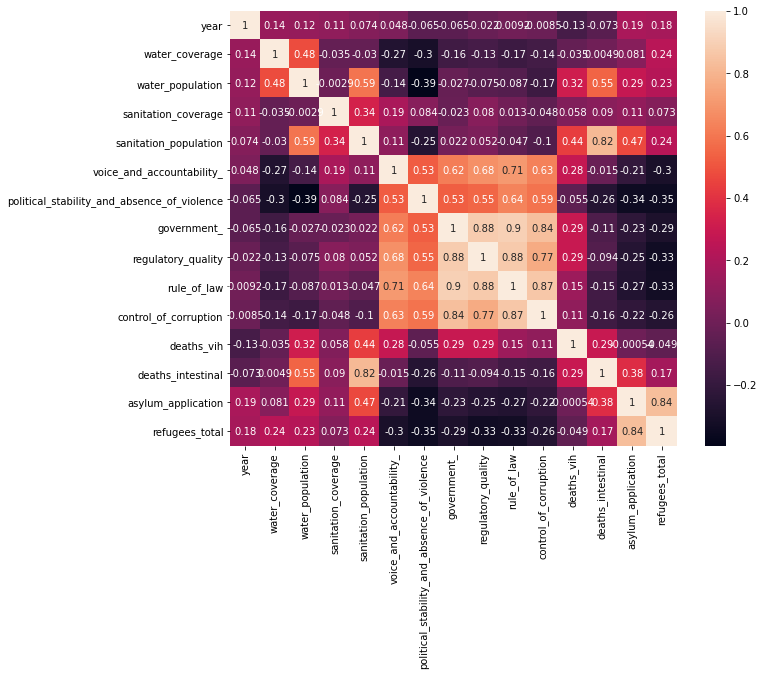

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data1.corr(method='pearson')
corr_matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [42]:
data = data1.drop(['year','country'],axis=1)

X = data.drop(['refugees_total'],axis=1)
y = data['refugees_total']

X.head(5)
y.head(5)

,water_coverage,water_population,service_level,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,form_of_government,control_cat
0,5.46453,1.748377e+06,Limited service,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,parliamentary unitary republic,low
1,5.44399,1.764044e+06,Limited service,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,parliamentary unitary republic,medium-low
2,5.42323,1.780507e+06,Limited service,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,parliamentary unitary republic,medium-low
3,5.40235,1.798358e+06,Limited service,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,parliamentary unitary republic,medium-low
4,5.38126,1.817678e+06,Limited service,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,parliamentary unitary republic,medium-low


0    7176
1    7210
2    6627
3    8883
4    4813
Name: refugees_total, dtype: int64

In [43]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes('object')

X_num.head(5)
X_cat.head(5)

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application
0,5.46453,1.748377e+06,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0
1,5.44399,1.764044e+06,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0
2,5.42323,1.780507e+06,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0
3,5.40235,1.798358e+06,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0
4,5.38126,1.817678e+06,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0


,service_level,form_of_government,control_cat
0,Limited service,parliamentary unitary republic,low
1,Limited service,parliamentary unitary republic,medium-low
2,Limited service,parliamentary unitary republic,medium-low
3,Limited service,parliamentary unitary republic,medium-low
4,Limited service,parliamentary unitary republic,medium-low


In [44]:
def plot_var(df):
    col_names_d = X_num.columns.tolist()
    for i in range(len(col_names_d)):
        print('for variable',col_names_d[i])
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        
def plot_var_box(df):
    col_names_c = df.columns.tolist()
    for i in range(len(col_names_c)):
        print('for variable',col_names_c[i])
        sns.boxplot(df.iloc[:,i])
        plt.show()
        #return df.iloc[i]
    #return plt.show()
def plot_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        plt.hist(df.iloc[:,i])
        plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
        plt.show()

def plot_count_cat(df):
    col_names_cat = X_cat.columns.tolist()
    for i in range(len(col_names_cat)):
        print('for variable',col_names_cat[i])
        sns.countplot(df.iloc[:,i])
        plt.show()

for variable water_coverage


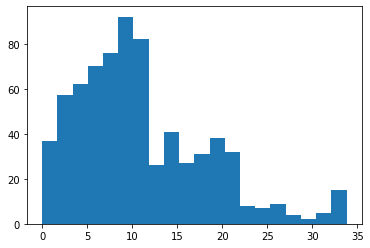

for variable water_population


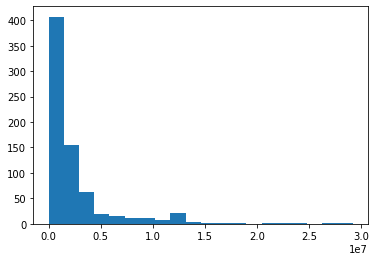

for variable sanitation_coverage


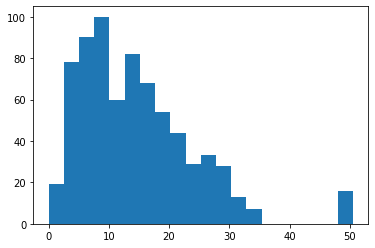

for variable sanitation_population


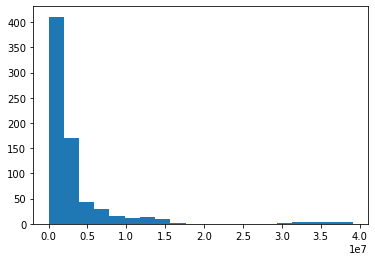

for variable voice_and_accountability_


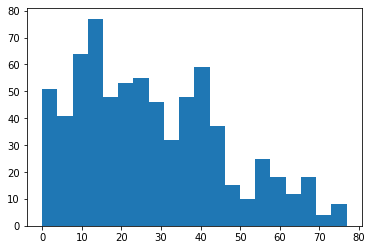

for variable political_stability_and_absence_of_violence


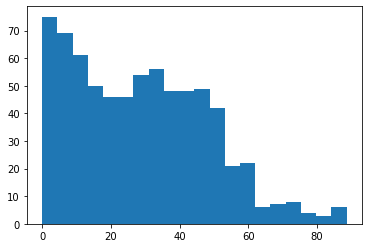

for variable government_


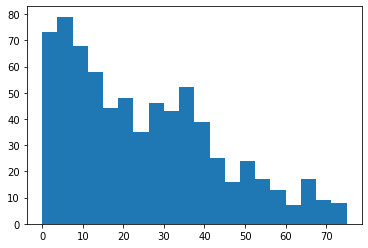

for variable regulatory_quality


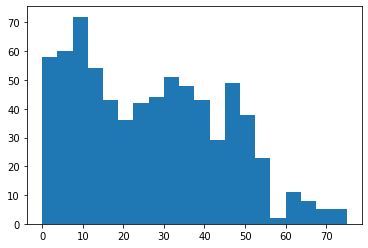

for variable rule_of_law


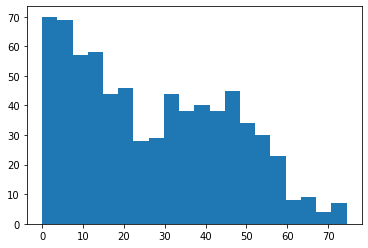

for variable control_of_corruption


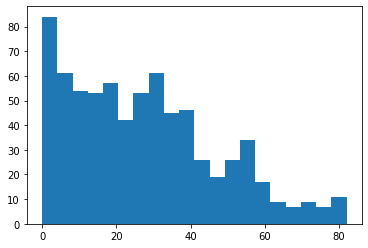

for variable deaths_vih


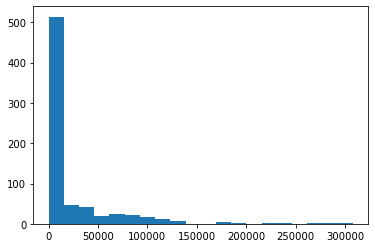

for variable deaths_intestinal


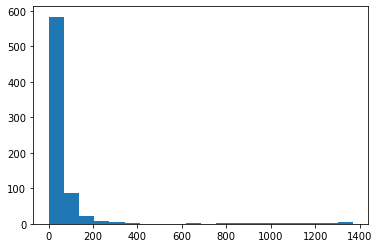

for variable asylum_application


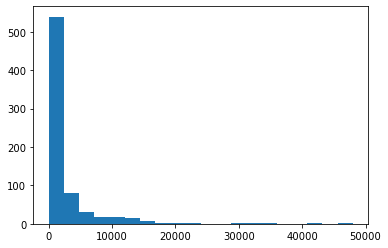

In [45]:
plot_var(X_num)

for variable service_level


/Users/nataliajanssen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


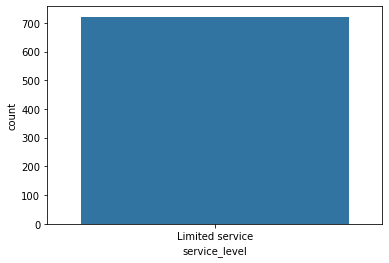

for variable form_of_government


/Users/nataliajanssen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


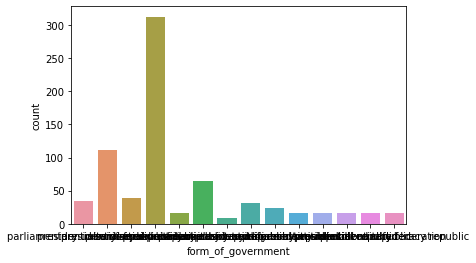

for variable control_cat


/Users/nataliajanssen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


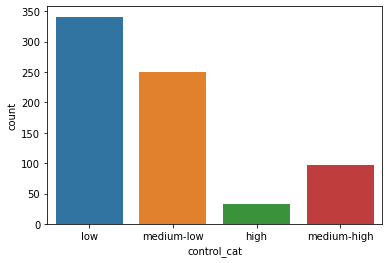

In [46]:
plot_count_cat(X_cat)

In [47]:
X_cat = X_cat.drop(['service_level'],axis=1)
X = pd.concat([X_num,X_cat],axis=1)

X.head()
y.head()

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,form_of_government,control_cat
0,5.46453,1.748377e+06,8.41044,2.690925e+06,18.905472,6.878307,31.122450,29.591837,33.168316,23.232323,337.356467,5.989716,9867.0,parliamentary unitary republic,low
1,5.44399,1.764044e+06,8.41781,2.727667e+06,18.905472,5.527638,31.122450,32.142857,31.683168,28.787878,360.341265,5.450697,8041.0,parliamentary unitary republic,medium-low
2,5.42323,1.780507e+06,8.42380,2.765626e+06,23.557692,10.679611,34.482758,30.049261,33.492825,27.804878,383.470642,5.094135,10230.0,parliamentary unitary republic,medium-low
3,5.40235,1.798358e+06,8.42849,2.805711e+06,25.480770,20.388350,39.215687,42.647060,28.229666,40.000000,405.811788,4.736456,5343.0,parliamentary unitary republic,medium-low
4,5.38126,1.817678e+06,8.43183,2.848097e+06,22.596153,15.458938,38.048782,29.411764,27.751196,36.585365,426.181157,4.423569,3615.0,parliamentary unitary republic,medium-low


0    7176
1    7210
2    6627
3    8883
4    4813
Name: refugees_total, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [49]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application
784,12.85646,2.076365e+06,27.34239,4.415894e+06,14.778325,24.761906,11.057693,3.365385,8.173077,9.615385,27575.735839,2.811039,711.0
490,17.30626,6.068074e+05,10.36151,3.633044e+05,21.800947,19.431280,20.095694,26.315790,22.748816,30.622009,221.325451,1.828012,1827.0
122,15.37505,3.510818e+06,18.53141,4.231559e+06,22.660099,15.238095,21.634615,16.826923,15.384615,12.980769,35823.446482,24.767347,3687.0
623,3.27288,4.760771e+05,15.67437,2.280011e+06,58.128078,37.142857,40.384617,46.153847,53.846153,58.173077,2788.011008,18.185307,6834.0
524,5.42781,1.783515e+06,4.74139,1.557965e+06,27.699530,33.649288,48.815166,50.236965,48.826290,42.180096,1288.024263,6.626223,2101.0


In [50]:
transformer = StandardScaler().fit(numericals_train) #this line teaches standardscaler where points are, subtracting mean to it, and dividing by standard deviation
numericals_train_standardized = transformer.transform(numericals_train) #this line transforms based on what it learned in the previous line
numericals_test_standardized = transformer.transform(numericals_test) 
numericals_test_standardized

array([[ 0.56924121, -0.62986041, -1.11513467, ..., -0.49221989,
        -0.34719064, -0.51663059],
       [-0.68554265, -0.07717814, -0.89252208, ..., -0.48823249,
        -0.30064392, -0.32548669],
       [-0.47956596,  0.19424105,  0.42502646, ...,  2.07829124,
        -0.28494234, -0.46745578],
       ...,
       [-0.652506  , -0.63770521,  1.60005182, ..., -0.46940616,
        -0.3509741 , -0.51683634],
       [-0.58194551, -0.63038468,  0.01307578, ..., -0.48528367,
        -0.32981383, -0.24874107],
       [-1.14184291, -0.52419089, -0.74109692, ..., -0.4501924 ,
        -0.26086896, -0.45799118]])

In [51]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 784 to 570
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   water_coverage                               504 non-null    float64
 1   water_population                             504 non-null    float64
 2   sanitation_coverage                          504 non-null    float64
 3   sanitation_population                        504 non-null    float64
 4   voice_and_accountability_                    504 non-null    float64
 5   political_stability_and_absence_of_violence  504 non-null    float64
 6   government_                                  504 non-null    float64
 7   regulatory_quality                           504 non-null    float64
 8   rule_of_law                                  504 non-null    float64
 9   control_of_corruption                        504 non-null    float64
 10  

In [52]:
#now encoding the categorical variables

categoricals_train= X_train.select_dtypes(np.object)
categoricals_test= X_test.select_dtypes(np.object)
categoricals_train.head()

,form_of_government,control_cat
784,presidential unitary republic,low
490,presidential republic,medium-low
122,presidential unitary republic,low
623,presidential unitary republic,medium-high
524,parliamentary unitary constitutional monarchy,medium-low


In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train) #drop=first, drops one of the values so we don't have redundant
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [54]:
X_train
categoricals_train_encoded

,water_coverage,water_population,sanitation_coverage,sanitation_population,voice_and_accountability_,political_stability_and_absence_of_violence,government_,regulatory_quality,rule_of_law,control_of_corruption,deaths_vih,deaths_intestinal,asylum_application,form_of_government,control_cat
784,12.85646,2.076365e+06,27.34239,4.415894e+06,14.778325,24.761906,11.057693,3.365385,8.173077,9.615385,27575.735839,2.811039,711.0,presidential unitary republic,low
490,17.30626,6.068074e+05,10.36151,3.633044e+05,21.800947,19.431280,20.095694,26.315790,22.748816,30.622009,221.325451,1.828012,1827.0,presidential republic,medium-low
122,15.37505,3.510818e+06,18.53141,4.231559e+06,22.660099,15.238095,21.634615,16.826923,15.384615,12.980769,35823.446482,24.767347,3687.0,presidential unitary republic,low
623,3.27288,4.760771e+05,15.67437,2.280011e+06,58.128078,37.142857,40.384617,46.153847,53.846153,58.173077,2788.011008,18.185307,6834.0,presidential unitary republic,medium-high
524,5.42781,1.783515e+06,4.74139,1.557965e+06,27.699530,33.649288,48.815166,50.236965,48.826290,42.180096,1288.024263,6.626223,2101.0,parliamentary unitary constitutional monarchy,medium-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,6.04046,3.140768e+05,25.57101,1.329577e+06,39.303482,19.095478,9.693877,13.775510,13.861386,18.181818,2754.522614,30.892910,2511.0,presidential unitary republic,low
59,8.41061,1.858070e+05,5.49594,1.214162e+05,61.576355,87.619049,71.153847,68.269234,72.115387,77.403847,5930.376400,0.631210,15.0,parliamentary unitary republic,high
364,4.92699,7.124217e+04,12.35642,1.786686e+05,27.403847,28.985508,15.048544,15.048544,7.655502,7.766990,1881.658144,7.794457,152.0,semi-presidential unitary republic,low
85,19.55258,1.659824e+06,8.40482,7.134876e+05,29.383886,12.796208,13.397129,10.526316,12.322275,11.483253,8459.725077,22.418951,371.0,presidential unitary republic,low


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [56]:
def func_train_test(model): #lm= list of models
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score of LR model is: ',r2_score(y_test, y_pred),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=4)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return print('no model applicable')

In [57]:
func_train_test('LinearRegression')

R2 score of LR model is:  0.8625146749388231 & score is:  0.8625146749388231


In [58]:
func_train_test('KNeighborsRegressor')

KNeighborscore is:  0.9340362382376689


In [59]:
func_train_test('MLPRegressor')

MLPscore is:  0.038851575145465


/Users/nataliajanssen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
scores = []
for k in range(2,14):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

[0.8963529796914749,
 0.9026574655713322,
 0.9340362382376689,
 0.928594335101749,
 0.9241632584701104,
 0.9084160797345677,
 0.8767973794734023,
 0.8507984119421568,
 0.8302522978488125,
 0.8159872250432678,
 0.7985858724487469,
 0.8016607835323135]

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'accuracy scores vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Accuracy')

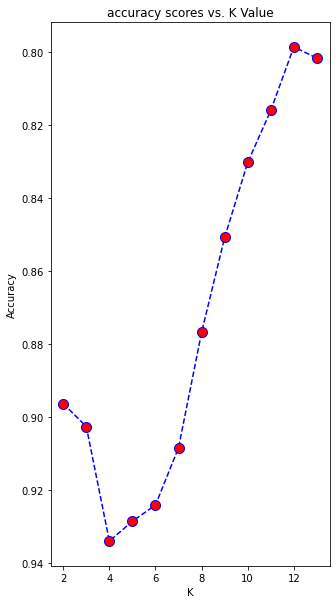

In [61]:
plt.figure(figsize=(5,10))
plt.plot(range(2,14),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')